# Project 1: Voltage and Current Relationship in a Diode
## Abstract: 
In this lab, we studied and examined the relationship between voltage and current passing through a diode as opposed to the Ohm's law relationship in a resistor. We did this by measuring the voltage drop across the resistor connected in the circuit and using Kirchoff's law and Ohm's law to figure out the current passing through the diode. We graphed this relationship and fitted this relationship with respect to the Shockley Equation Model: $$ I = I_o (e^{\frac{q V_d}{\eta k_b T}}-1) $$
This model, was simplified to: $$ V_{ext} = A \ln(I) + B + I C $$
with C = r. 
From the curve fit, we figured out the values of A, B, and C to be, 0.04128 +/- 0.00095, 2.10020 +/- 0.00719, 9.30731 +/- 0.49903 respectively. We used these values to work back and figure out the Saturation Current, $ I_0 $, to be 7.99e-23 A with uncertainty of 2.64% and Emmission Coefficient, $ \eta $, to be 1.59 which has an uncertainty value of 2.3%.
## Description
In this project, the first thing we had to do was set up the circuit shown below with unknown resistors and program the Arduino to collect data as we adjust the driving current through the diode, run the program to collect voltage vs. time data from the Arduino, analyze the collected data using Jupiter and compare results vs expectations and carry out the Statistical Exercises.
## Schematic, Background Discussion
The Arduino, a programmable circuit board has a time constant, $ \tau $, of 2 milli-seconds. The RC circuit is a circuit in physics composed of a resistor R and a capacitor C connected in series. The time constant, $ \tau $, of the circuit and is given by the product RC. A resistor of 10k $\Omega$ and 10 $ \mu $F results in a time constant of a 100 milliseconds. We needed a time constant this big because the pin 3 of the arduino board PWM signal runs at a frequency of 490 Hz that means there is a time difference of 2 milliseconds when it is at 5 volts and when it is at zero volts, so we needed something much greater that. The 100 milliseconds shows how long it takes for the capacitor to charge. An Amplifier was placed in between the RC circuit and the main circuit to act as a buffer because, the 10k $\Omega$ resistor would cause a significant drop in voltage and the diode wouldn't draw much current when connected directly to the RC circuit. The R2 resistor's value was chosen to be 330 $\Omega$ because the Diode used requires about 15mA to 20mA and has a forward voltage of 1.75 V. According to Ohm's law,the resistance should be beween 250 $\Omega$ and 333 $\Omega$.

![proj1.png](proj1.png)

R1 = 10000 $\Omega$

R2 = 330 $\Omega$

C1 = 10 $ \mu $F

## Circuit Function, including code + data
We programmed the Arduino with the following "C" program:

    //File name: Project_1_Code.ino
    //     Name: David Lanade & Bill Faton
    //     Date: 01/16/2020 
    //   Course: PHYS 230
    //     Desc: This code collects the data for Project 1

    //This block sets up the pin numbers
    #define psu 3 //Digital pin 3 is our "power output pin" 
    #define probe1 1 //Analog pin 1 is our 
    #define probe2 2
    #define blinker 5 //Digital pin 5 is the pin we use to blink the led


    void setup(){
       pinMode(psu, OUTPUT);
       pinMode(blinker, OUTPUT);

       Serial.begin(9600); //Sets up the serial output
       Serial.println("i,probe1,probe2"); //Prints out a header for the csv
    }

    void loop(){

        for (int i = 0; i <= 255; i += 1){

        analogWrite(psu, i); //Increases the duty cylce of the 5V PWM output of the pin by ~0.39% everytime the loop goes through

        delay(300); //Leaves enough time for the RC circuit to charge

        //This block prints the value of the PWM duty cycle between 0 and 255 and the 10 bit analog reading before and after the resistor R2
        Serial.print(i);
        Serial.print(",");
        Serial.print(analogRead(probe1)); //Reads and prints the 10 bit analog reading at the pin "probe1"
        Serial.print(",");
        Serial.println(analogRead(probe2)); //Reads and prints the 10 bit analog reading at the pin "probe2"
        }

      analogWrite(psu, 0); //Cuts power to the circuit after the sweep

        while(1){ //Infinite loop that blinks an led to indicates the sweep is done

        analogWrite(blinker, 255);
        delay(100);
        analogWrite(blinker, 0);
        delay(100);
        }
    }

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as pl 
import numpy as np
db = pd.read_csv('Project_1 Data.csv')
db

,i,probe1,probe2
0,0,19,19
1,1,5,5
2,2,7,7
3,3,10,12
4,4,14,16
...,...,...,...
251,251,723,394
252,252,724,393
253,253,724,394
254,254,724,394


The table above shows the Arduino reading for the voltage values as recorded under the columns, probe 1 and probe 2 which indicates the voltage before and after the resistor for each increment of the duty cycle from 0 to 255. These voltage values are scaled such that one unit is 4.9 milliVolts.

Text(0, 0.5, 'Initial and Final Analog Reading')

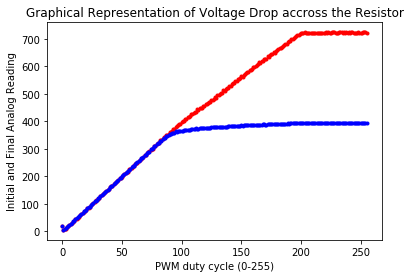

In [3]:
pl.plot(db.i,db.probe1,'r.')
pl.plot(db.i,db.probe2,'b.')
pl.title("Graphical Representation of Voltage Drop accross the Resistor")
pl.xlabel("PWM duty cycle (0-255)")
pl.ylabel("Initial and Final Analog Reading")

The graph above shows the relationship between inital and final voltage values with duty cycle. A significant voltage drop is noticed when the duty cycle is about 90 and that is where significant seperation between initial and final voltage is observed in the graph

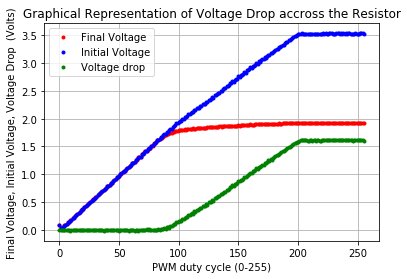

In [4]:
count = db.i.values
v_final = db.probe2.values*5.0/1023.0
v_initial = db.probe1.values*5.0/1023.0
V_drop = v_initial-v_final
pl.title("Graphical Representation of Voltage Drop accross the Resistor")
pl.xlabel("PWM duty cycle (0-255)")
pl.ylabel("Final Voltage, Initial Voltage, Voltage Drop  (Volts)")
pl.plot(count, v_final, 'r.', label = "Final Voltage")
pl.plot(count,v_initial,'b.', label = "Initial Voltage")
pl.plot(count,V_drop,'g.', label = "Voltage drop")
pl.legend()
pl.grid()

Converting the probe values, which are scaled such that one unit is 4.9 millivolts, to actual voltage we get the same graph.

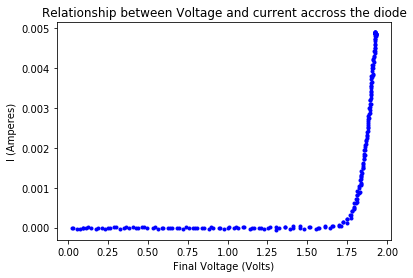

In [5]:
R = 330.0
V_drop = v_initial-v_final
I_diode = V_drop/R
pl.title("Relationship between Voltage and current accross the diode")
pl.xlabel("Final Voltage (Volts)")
pl.ylabel("I (Amperes)")
pl.plot(v_final, I_diode,'b.')

Using Ohm's Law, we can figure out the current flowing through the diode. Firstly, you calculate the Voltage drop across the resistor and use this to figure out the current passing through the resistor. The graph above shows the relationship betweem current and voltage in the diode.

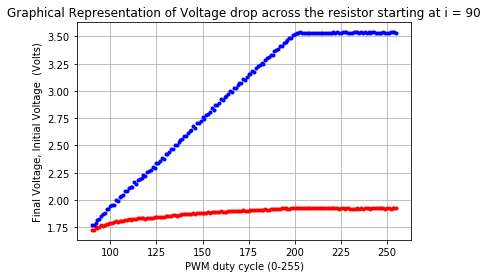

In [6]:
A = 90
count = db.i[A:].values
v_final = db.probe2[A:].values*5.0/1023.0
v_initial = db.probe1[A:].values*5.0/1023.0
pl.title("Graphical Representation of Voltage drop across the resistor starting at i = 90")
pl.xlabel("PWM duty cycle (0-255)")
pl.ylabel("Final Voltage, Initial Voltage  (Volts)")
pl.plot(count, v_final, 'r.')
pl.plot(count,v_initial,'b.')
pl.grid()

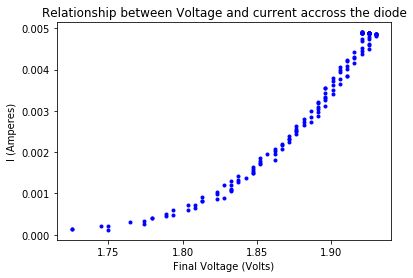

In [7]:
R = 330.0
V_drop = v_initial-v_final
I_diode = V_drop/R
pl.title("Relationship between Voltage and current accross the diode")
pl.xlabel("Final Voltage (Volts)")
pl.ylabel("I (Amperes)")
pl.plot(v_final, I_diode,'b.')

The graph above is just a magnification of the previous current, voltage graph. Because we are concentrating on when the current in the diode increases with voltage. At 1.75 volts, the diode starts lighting up this signifies an increase in current.







In order to obtain a fitting curve, we will need to develop the Shockley model and write a function that returns the voltage.

$$ I = I_o (e^{\frac{q V_d}{\eta k_b T}}-1) $$

After simplifications, we end up with the form:

$$ V_{ext} = A \ln(I) + B + I C $$

Where $ B = -A \ln (I_0) $

with C = r, which is the internal resistance of the diode.
Using the curve fit function, we can find values for A, B, and C that will fit the curve pretty precisely.

In [8]:
from scipy.optimize import curve_fit
def internal_R_model(I, A, B, C):
    return A*np.log(I)+ C*I + B
A,B,C=0,0,0
par, cov = curve_fit(internal_R_model, I_diode, v_final, p0=(A,B,C))
A,B,C = par
dA,dB,dC = np.sqrt(np.diag(cov))
print("A={0:.5f} +/- {1:.5f}".format(A,dA))
print("B={0:.5f} +/- {1:.5f}".format(B,dB))
print("C={0:.5f} +/- {1:.5f}".format(C,dC))

A=0.04128 +/- 0.00095
B=2.10020 +/- 0.00719
C=9.30731 +/- 0.49903


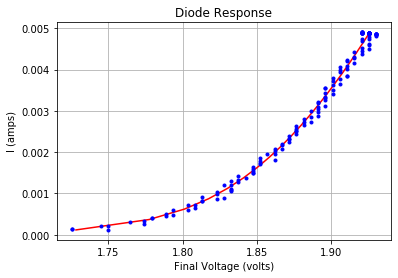

In [9]:
ith = np.linspace(min(I_diode),max(I_diode),20);ith
model = internal_R_model(ith,A,B,C)
pl.plot(model,ith,'r-')
pl.plot(v_final, I_diode, 'b.')
pl.title("Diode Response")
pl.xlabel("Final Voltage (volts)")
pl.ylabel("I (amps)")
pl.grid()

A and B were values used to simplify the shockley equation and get a fit. Now we have gotten values for A and B we have to work back to get the values of $\eta$ and $I_0$.
$$ I = I_o (e^{\frac{q V_d}{\eta k_b T}}) $$, $\eta q V_d$ is much greater than $k_b T$, so the $-1$ in parenthesis is negligable compared to the exponential. 
$$ V = \frac {\eta k_b T}{q} \ln(I) - \frac {\eta k_b T}{q}\ln(I_0) $$
$$ B = -A \ln (I_0) $$
$$ \eta = A \frac{q}{k_bT} $$
$$ I_0 = e^\frac{-B}{A} $$
Using this formula transformations to solve for $ \eta $ and $I_0$. We obtain their values

In [10]:
I0 = np.exp(-B/A)
q = 1.6e-19
T = 300.0
k_b = 1.38064852e-23
eta = ((A * q) / (k_b * T))
print ("Saturation Current: ", I0)
print ("Emmission Coefficient: ", eta)

Saturation Current:  7.98883332136065e-23
Emmission Coefficient:  1.5944695698593636


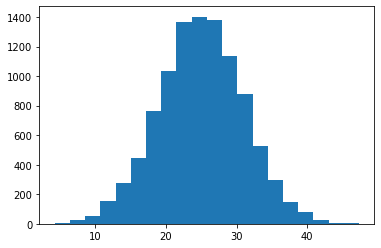

In [11]:
mu = 25
std = 6
N = 10000
stats1 = np.random.normal(loc=mu, scale = std, size = N)
histogram = pl.hist(stats1, bins=20)

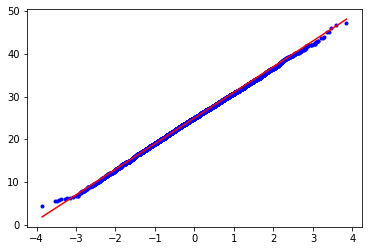

In [18]:
stats1 = np.array(sorted(stats1))
stats2 = np.array(sorted(np.random.normal(loc=0, scale=1.0, size=N)))

pl.plot(stats2, stats1,'b.')       
pl.plot(stats2, stats2*std + mu,'r-')

In [21]:
print("Probability x>35 = ", len(stats1[stats1>35])/N)
print("Probability(%) = ", len((stats1[stats1>35])/(N*0.01)))

Probability x>35 =  0.0467
Probability(%) =  467


## Conclusion
The purpose of this lab was to familiarize students with software, materials, functions that would be used this semester. The first thing we did was observing the relationship between voltage and current passing through a diode. We compared this to the shockley equation and figured out the variables, Saturation Current, $ I_0 $, to be 7.99e-23 A with an uncertainty of 2.64% and Emmission Coefficient, $ \eta $, to be 1.59 which has an uncertainty value of 2.3%. The second exercise was about computing the probability of getting a number greater than 35 from a distribution of 10000 random numbers, mean of 25, and standard deviation of 6. This was found to be 0.051.
